### Protein

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import pandas as pd

In [2]:
G = nx.read_edgelist('networks/protein.edgelist.txt', create_using=nx.Graph(), nodetype=int)

In [3]:
# distribuição empírica (faça um gráfico com
# as diferentes redes).

n_V = G.number_of_nodes()
n_E = G.number_of_edges()
print(f"Number of nodes: {n_V}")
print(f"Number of edges: {n_E}")
print(f"Directed graph: {nx.is_directed(G)}")
print(f"Connected graph: {nx.is_connected(G)}")
print(f"Connected components: {nx.number_connected_components(G)}")

Number of nodes: 2018
Number of edges: 2930
Directed graph: False
Connected graph: False
Connected components: 185


In [4]:
# Degree
degrees = np.array([int(dg) for (node, dg) in G.degree()])
print(f"Max: {degrees.max()}")
print(f"Min: {degrees.min()}")
print(f"Mean: {degrees.mean()}")
print(f"Median: {np.median(degrees)}")
print(f"Std: {degrees.std()}")


Max: 91
Min: 1
Mean: 2.9038652130822595
Median: 2.0
Std: 4.881923426132511


In [5]:
# Distance
if nx.is_connected(G):
    d_mean = nx.average_shortest_path_length(G)
    print(f"{d_mean}")

dist = dict(nx.all_pairs_shortest_path_length(G))
distas = list()
for i in dist.values():
    distas = distas+list(i.values())
distas = np.array(distas)
distas = distas[distas != 0]
print(f"Max: {distas.max()}")
print(f"Min: {distas.min()}")
print(f"Mean: {distas.mean()}")
print(f"Median: {np.median(distas)}")
print(f"Std: {distas.std()}")

Max: 14
Min: 1
Mean: 5.6109290866980395
Median: 6.0
Std: 1.646376867828377


In [6]:
# Connected components
print(f"N connected components: {nx.number_connected_components(G)}")
cc = np.array([len(c) for c in nx.connected_components(G)])
print(f"Max: {cc.max()}")
print(f"Min: {cc.min()}")
print(f"Mean: {cc.mean()}")
print(f"Median: {np.median(cc)}")
print(f"Std: {cc.std()}")

N connected components: 185
Max: 1647
Min: 1
Mean: 10.908108108108108
Median: 2.0
Std: 120.61745285927152


In [7]:
# Cluster
cluster = np.array(list(nx.clustering(G).values()))
print(f"Max: {cluster.max()}")
print(f"Min: {cluster.min()}")
print(f"Mean: {cluster.mean()}")
print(f"Median: {np.median(cluster)}")
print(f"Std: {cluster.std()}")
print(f"Global: {nx.transitivity(G)}")

Max: 1.0
Min: 0.0
Mean: 0.046194001297365124
Median: 0.0
Std: 0.17603114068332915
Global: 0.02361415364051535


In [8]:
# Degree centrality
dc = np.array(list(nx.degree_centrality(G).values()))
print(f"Max: {dc.max()}")
print(f"Min: {dc.min()}")
print(f"Mean: {dc.mean()}")
print(f"Median: {np.median(dc)}")
print(f"Std: {dc.std()}")

Max: 0.0451165096678235
Min: 0.0004957858205255329
Mean: 0.0014396951973635397
Median: 0.0009915716410510659
Std: 0.0024203884115679276


In [9]:
# Betweeness centrality
bc = np.array(list(nx.betweenness_centrality(G).values()))
print(f"Max: {bc.max()}")
print(f"Min: {bc.min()}")
print(f"Mean: {bc.mean()}")
print(f"Median: {np.median(bc)}")
print(f"Std: {bc.std()}")

Max: 0.18151976215555363
Min: 0.0
Mean: 0.0015236220900641463
Median: 0.0
Std: 0.006881556812597941


In [10]:
# Closeness centrality
cloc = np.array(list(nx.closeness_centrality(G).values()))
print(f"Max: {cloc.max()}")
print(f"Min: {cloc.min()}")
print(f"Mean: {cloc.mean()}")
print(f"Median: {np.median(cloc)}")
print(f"Std: {cloc.std()}")

Max: 0.24498275690734178
Min: 0.0
Mean: 0.1224292730964651
Median: 0.14145329150410224
Std: 0.06225392075786067


In [11]:
# Eigenvector centrality
ec = np.array(list(nx.eigenvector_centrality(G).values()))
print(f"Max: {ec.max()}")
print(f"Min: {ec.min()}")
print(f"Mean: {ec.mean()}")
print(f"Median: {np.median(ec)}")
print(f"Std: {ec.std()}")

Max: 0.4654668822552674
Min: 4.323660793748502e-25
Mean: 0.006895226561824924
Median: 0.0005193122373762252
Std: 0.021165915747076533


In [12]:
# Katz centrality
kc = np.array(list(nx.katz_centrality_numpy(G).values()))
print(f"Max: {kc.max()}")
print(f"Min: {kc.min()}")
print(f"Mean: {kc.mean()}")
print(f"Median: {np.median(kc)}")
print(f"Std: {kc.std()}")

Max: 0.5319081422199433
Min: -0.19770818666474355
Mean: 0.0050298731757291255
Median: 0.0012864590315586546
Std: 0.021685029734526986


In [13]:
# PageRank centrality
pr = np.array(list(nx.pagerank(G).values()))
print(f"Max: {pr.max()}")
print(f"Min: {pr.min()}")
print(f"Mean: {pr.mean()}")
print(f"Median: {np.median(pr)}")
print(f"Std: {pr.std()}")

Max: 0.01020159326747166
Min: 0.00016335709439221495
Mean: 0.0004955401387512388
Median: 0.0003840031352760571
Std: 0.0005809020165672083


In [14]:
# VoteRank centrality
vr = np.array(nx.voterank(G))
print(f"Max: {vr.max()}")
print(f"Min: {vr.min()}")
print(f"Mean: {vr.mean()}")
print(f"Median: {np.median(vr)}")
print(f"Std: {vr.std()}")

Max: 2017
Min: 6
Mean: 986.5324189526184
Median: 959.5
Std: 576.7896854299131


In [15]:
# Jaccard similarity
jaccard = np.array(list(p for (u, v, p) in nx.jaccard_coefficient(G)))
print(f"Max: {jaccard.max()}")
print(f"Min: {jaccard.min()}")
print(f"Mean: {jaccard.mean()}")
print(f"Median: {np.median(jaccard)}")
print(f"Std: {jaccard.std()}")


Max: 1.0
Min: 0.0
Mean: 0.0024313333912945635
Median: 0.0
Std: 0.033385140219770904


In [16]:
# Coefficient Adamic/Adar
caa = np.array(list(p for (u, v, p) in nx.adamic_adar_index(G)))
print(f"Max: {caa.max()}")
print(f"Min: {caa.min()}")
print(f"Mean: {caa.mean()}")
print(f"Median: {np.median(caa)}")
print(f"Std: {caa.std()}")

Max: 14.30304051308118
Min: 0.0
Mean: 0.004368381235791592
Median: 0.0
Std: 0.05574718405356366


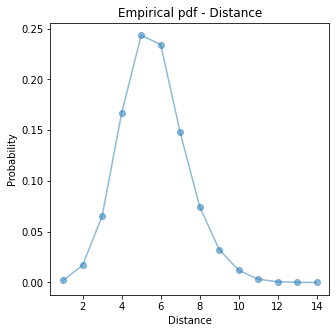

In [17]:
# pdf
x, f_k = np.unique(distas, return_counts=True)
pdf = f_k/f_k.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical pdf - Distance')
plt.xlabel('Distance')
plt.ylabel('Probability')

plt.scatter(x, pdf, alpha=0.5)
plt.plot(x, pdf, alpha=0.5)
plt.show()

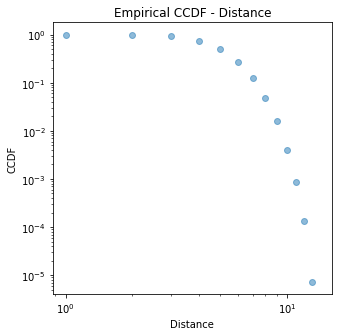

In [18]:
# CCDF
cdf = f_k.cumsum()/f_k.sum()
ccdf = 1-cdf

plt.figure(figsize=(5,5))
plt.scatter(x, ccdf, alpha=0.5)
plt.title('Empirical CCDF - Distance')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance')
plt.ylabel('CCDF')

plt.show()

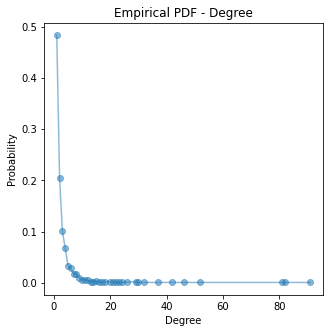

In [19]:
# pdf
x_g, f_k_g = np.unique(degrees, return_counts=True)
pdf_g = f_k_g/f_k_g.sum()

plt.figure(figsize=(5,5))
plt.title('Empirical PDF - Degree')
plt.xlabel('Degree')
plt.ylabel('Probability')

plt.scatter(x_g, pdf_g, alpha=0.5)
plt.plot(x_g, pdf_g, alpha=0.5)
plt.show()

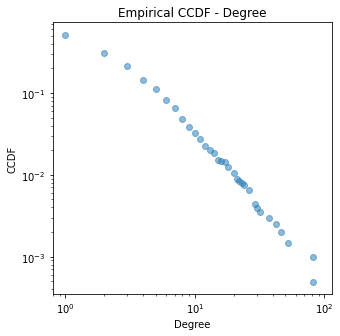

In [20]:
# CCDF
cdf_g = f_k_g.cumsum()/f_k_g.sum()
ccdf_g = 1-cdf_g

plt.figure(figsize=(5,5))
plt.scatter(x_g, ccdf_g, alpha=0.5)
plt.title('Empirical CCDF - Degree')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('CCDF')

plt.show()

In [21]:
np.savetxt('data/protein-dista-x.txt', x, delimiter=',', fmt='%d')
np.savetxt('data/protein-dista-pdf.txt', pdf, delimiter=',', fmt='%f')
np.savetxt('data/protein-dista-ccdf.txt', ccdf, delimiter=',', fmt='%f')

np.savetxt('data/protein-degree-x.txt', x_g, delimiter=',', fmt='%d')
np.savetxt('data/protein-degree-pdf.txt', pdf_g, delimiter=',', fmt='%f')
np.savetxt('data/protein-degree-ccdf.txt', ccdf_g, delimiter=',', fmt='%f')
